In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [2]:
df = pd.read_csv("covid_19_india.csv")
df["Date"] = pd.to_datetime(df["Date"])

In [3]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
dates = sorted(set(df["Date"]))

In [5]:
new_df = {}

In [6]:
for date in dates:
    new_df[date] = [sum(df[df["Date"] == date]["Confirmed"].values.tolist()), sum(df[df["Date"] == date]["Deaths"].values.tolist()), sum(df[df["Date"] == date]["Cured"].values.tolist())]

In [7]:
date = np.array(list(new_df.keys()))
confirmed = np.array(list(i[0] for i in new_df.values()))
deaths = np.array(list(i[1] for i in new_df.values()))
cured = np.array(list(i[2] for i in new_df.values()))

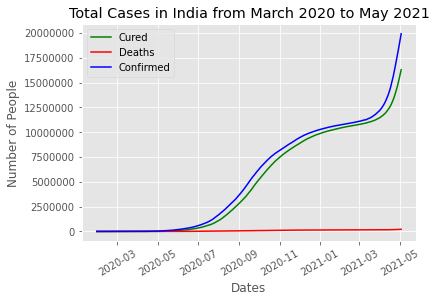

In [8]:
fig, ax = plt.subplots()  # a figure with a single Axes
ax.plot(date, cured, color="g")
ax.plot(date, deaths, color="r")
ax.plot(date, confirmed, color="b")
ax.ticklabel_format(style='plain', axis='y')
ax.legend(["Cured", "Deaths", "Confirmed"])
plt.xticks(rotation=30)
plt.xlabel("Dates")
plt.ylabel("Number of People")
plt.title("Total Cases in India from March 2020 to May 2021")
plt.show()
fig.savefig("india.png")